In [1]:
#Here photon is the boson
#This notebook uses the perceval package to do the task of boson sampling
#Note : Example modified from : https://perceval.quandela.net/docs/notebooks/Boson_sampling.html

In [2]:
from collections import Counter
import gzip
import pickle
import time
import numpy as np
import random
import networkx as nx
from scipy.linalg import sqrtm

import perceval as pcvl
from perceval.algorithm import Sampler

In [23]:
#This function embedded matrix A (which should be a square matrix) as the top left matrix inside a bigger matrix that is Unitary in nature

def to_unitary(A):
    ''' Input: graph A either as:
                                 an adjacency matrix of size mxm
                                 a networkX graph with m nodes
        Output: unitary with size 2mx2m
    '''

    if type(A) == type(nx.Graph()):
        A = nx.convert_matrix.to_numpy_matrix(A)
    P1, D, V = np.linalg.svd(A)

    c = np.max(D)
    # if it is not complex, then np.sqrt will output nan in complex values
    An = np.matrix(A/c, dtype=complex)
    P = An
    m = len(An)
    Q = sqrtm(np.identity(m)-np.dot(An, An.conj().T))
    R = sqrtm(np.identity(m)-np.dot(An.conj().T, An))
    S = -An.conj().T
    Ubmat = np.bmat([[P, Q], [R, S]])
    return (np.copy(Ubmat), c)


In [24]:
#A = np.random.randint(5,size=(2,2))
A = np.array([[5,6],[7,8]])
U,_ = to_unitary(A)

In [25]:
n = 2       #number of photons at the input
m = 4       #number of modes
N = 5000  #number of samplings


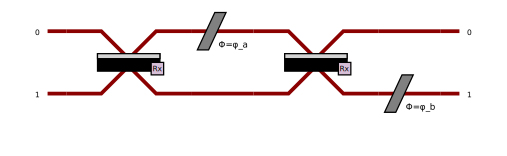

In [26]:
mzi = (pcvl.BS() // (0, pcvl.PS(phi=pcvl.Parameter("φ_a")))
       // pcvl.BS() // (1, pcvl.PS(phi=pcvl.Parameter("φ_b"))))
pcvl.pdisplay(mzi)

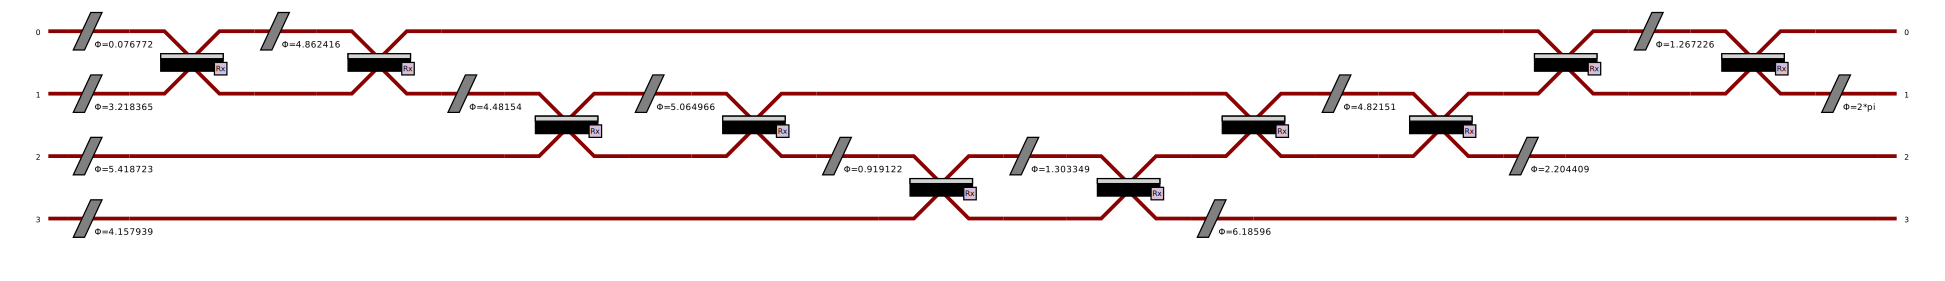

In [37]:
Linear_Circuit_4 = pcvl.Circuit.decomposition(U, mzi,
                                               phase_shifter_fn=pcvl.PS,
                                               shape="triangle")

pcvl.pdisplay(Linear_Circuit_4)


In [28]:
QPU = pcvl.Processor("CliffordClifford2017", Linear_Circuit_4)

In [29]:
#one can choose which mode he/she wants at input, or we can choose it randomly
input_state_str = '|1,1,0,0>'
input_state = pcvl.BasicState(input_state_str)
QPU.with_input(input_state)

In [30]:
# Keep all outputs
QPU.min_detected_photons_filter(0)

sampler = Sampler(QPU)

desired_state = "|1,1,0,0>"
desired_count = 0
total_count = 99999
print("The sampled outputs are:")
for out_state in sampler.samples(total_count)["results"]:
    if str(out_state) == desired_state:
        desired_count += 1
print("Desired Counts:",desired_count)
print("Approx. prob:",desired_count/total_count)

The sampled outputs are:
Desired Counts: 22347
Approx. prob: 0.22347223472234723
